In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

In [2]:
RANDOM_STATE = 42

# Data Definition

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [4]:
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

In [5]:
df = pd.read_csv(
    url,
    names=columns,
    na_values=" ?",         # 결측치 처리 위한 구분
    skipinitialspace=True,  # 쉼표 뒤에 공백 자동 제거
)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0000,32561.0000,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,189778.3665,10.0807,1077.6488,87.3038,40.4375
std,13.6404,105549.9777,2.5727,7385.2921,402.9602,12.3474
min,17.0000,12285.0000,1.0000,0.0000,0.0000,1.0000
25%,28.0000,117827.0000,9.0000,0.0000,0.0000,40.0000
50%,37.0000,178356.0000,10.0000,0.0000,0.0000,40.0000
75%,48.0000,237051.0000,12.0000,0.0000,0.0000,45.0000
max,90.0000,1484705.0000,16.0000,99999.0000,4356.0000,99.0000


# Preprocessing

### Target 컬럼 재정의

In [8]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df['income'].unique()

array([0, 1])

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Data Type 확인

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,T

## Correlation

In [13]:
# df.corr()
df_corr = df.corr()['income'].drop('income').sort_values(key=abs, ascending=False)
df_corr.head(10)

marital-status_Married-civ-spouse    0.4447
education-num                        0.3352
marital-status_Never-married        -0.3184
age                                  0.2340
hours-per-week                       0.2297
relationship_Own-child              -0.2285
capital-gain                         0.2233
sex_Male                             0.2160
occupation_Exec-managerial           0.2149
relationship_Not-in-family          -0.1885
Name: income, dtype: float64

In [14]:
top_10_features = df_corr.head(10).index.tolist()
top_10_corr = df[top_10_features + ['income']].corr()

top_10_corr

,marital-status_Married-civ-spouse,education-num,marital-status_Never-married,age,hours-per-week,relationship_Own-child,capital-gain,sex_Male,occupation_Exec-managerial,relationship_Not-in-family,income
marital-status_Married-civ-spouse,1.0000,0.0861,-0.6449,0.3157,0.2128,-0.3801,0.0859,0.4318,0.1070,-0.5376,0.4447
education-num,0.0861,1.0000,-0.0321,0.0365,0.1481,-0.0992,0.1226,0.0123,0.2009,0.0534,0.3352
marital-status_Never-married,-0.6449,-0.0321,1.0000,-0.5344,-0.1979,0.5092,-0.0663,-0.1714,-0.1059,0.2973,-0.3184
age,0.3157,0.0365,-0.5344,1.0000,0.0688,-0.4329,0.0777,0.0888,0.0994,-0.0101,0.2340
hours-per-week,0.2128,0.1481,-0.1979,0.0688,1.0000,-0.2493,0.0784,0.2293,0.1392,0.0075,0.2297
relationship_Own-child,-0.3801,-0.0992,0.5092,-0.4329,-0.2493,1.0000,-0.0536,-0.1024,-0.1014,-0.2512,-0.2285
capital-gain,0.0859,0.1226,-0.0663,0.0777,0.0784,-0.0536,1.0000,0.0485,0.0606,-0.0265,0.2233
sex_Male,0.4318,0.0123,-0.1714,0.0888,0.2293,-0.1024,0.0485,1.0000,0.0367,-0.1689,0.2160
occupation_Exec-managerial,0.1070,0.2009,-0.1059,0.0994,0.1392,-0.1014,0.0606,0.0367,1.0000,-0.0098,0.2149
relationship_Not-in-family,-0.5376,0.0534,0.2973,-0.0101,0.0075,-0.2512,-0.0265,-0.1689,-0.0098,1.0000,-0.1885


<Axes: >

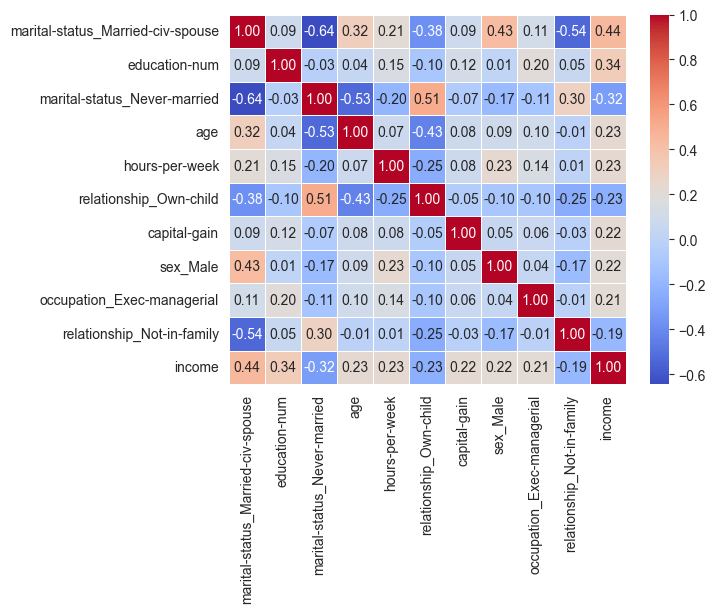

In [15]:
sns.heatmap(
    top_10_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)

# Machine Learning Classification

### Dataset Definition

In [16]:
X = df.drop('income', axis=1)
y = df['income']

# 먼저 train+valid와 test로 분할 (80:20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# train+valid를 다시 train과 valid로 분할 (75:25)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE
)

In [17]:
print(f"데이터 분할 결과:")
print(f"Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Valid: {len(X_valid)} ({len(X_valid)/len(X)*100:.1f}%)")
print(f"Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

데이터 분할 결과:
Train: 19536 (60.0%)
Valid: 6512 (20.0%)
Test: 6513 (20.0%)


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [19]:
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=RANDOM_STATE,
)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
model.score(X_train, y_train)

0.8485872235872236

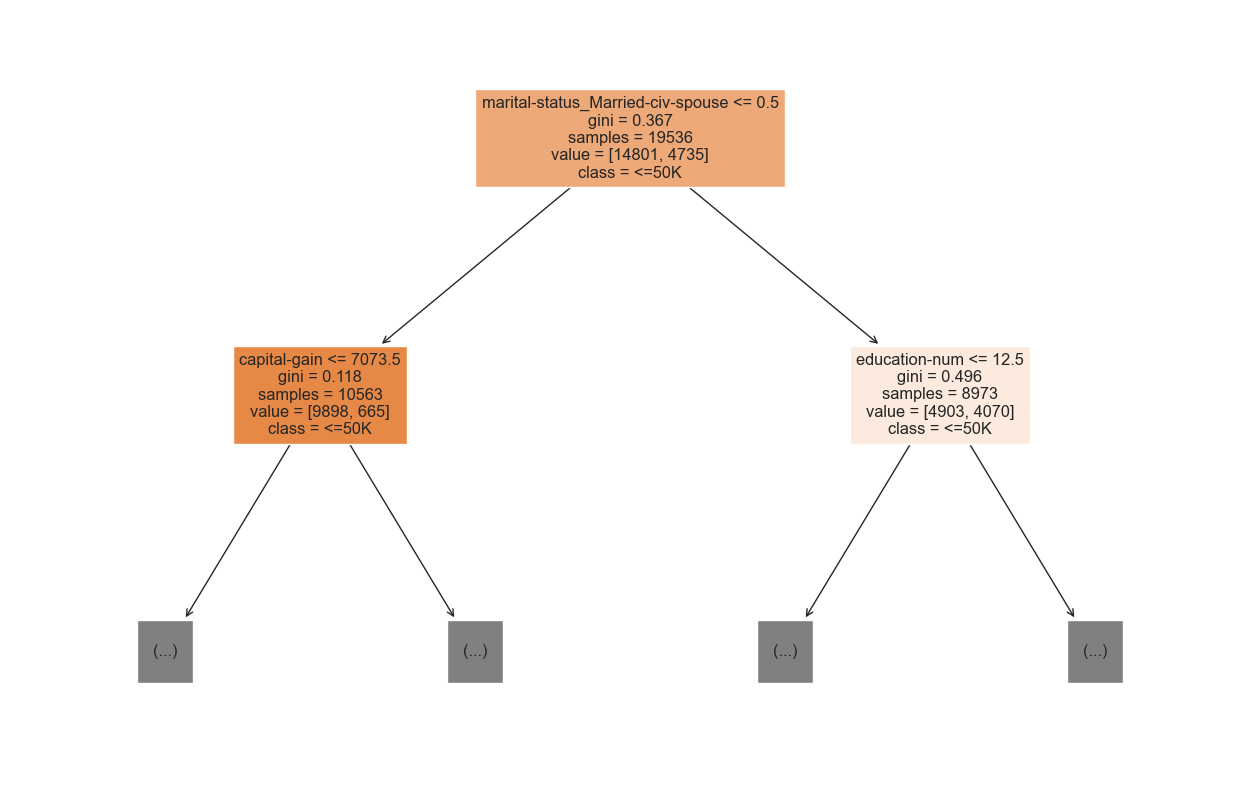

In [22]:
plt.figure(figsize=(16, 10))

plot_tree(
    model,
    feature_names=X.columns,
    class_names=['<=50K', '>50K'],
    filled=True,
    max_depth=1,  # 시각화 위해 제한
)

plt.show()

#### Feature Importacne

In [23]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
30,marital-status_Married-civ-spouse,0.4809
2,education-num,0.2256
3,capital-gain,0.2116
4,capital-loss,0.0381
5,hours-per-week,0.0215
0,age,0.0166
22,education_Bachelors,0.0032
1,fnlwgt,0.0012
40,occupation_Handlers-cleaners,0.0006
10,workclass_Self-emp-inc,0.0003


#### Predict

In [24]:
# 각 셋에 대한 예측
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

In [25]:
def calculate_classification_metrics(y_true, y_pred, set_name):
    """분류 성능 지표를 계산하는 함수 (Accuracy 중심)"""
    accuracy = accuracy_score(y_true, y_pred)
    
    return {
        'Set': set_name,
        'Accuracy': accuracy
    }

In [26]:
# 모든 셋의 성능 계산
train_metrics = calculate_classification_metrics(y_train, y_train_pred, 'Train')
valid_metrics = calculate_classification_metrics(y_valid, y_valid_pred, 'Valid')
test_metrics = calculate_classification_metrics(y_test, y_test_pred, 'Test')

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame([train_metrics, valid_metrics, test_metrics])
results_df = results_df.set_index('Set')

print("=== Decision Tree 분류 모델 성능 평가 ===")
print("="*50)
print(results_df.round(4))

=== Decision Tree 분류 모델 성능 평가 ===
       Accuracy
Set            
Train    0.8486
Valid    0.8475
Test     0.8501


#### Metrics 

In [27]:
# 과적합 분석
print(f"\n=== 과적합 분석 ===")
train_valid_acc_diff = train_metrics['Accuracy'] - valid_metrics['Accuracy']
valid_test_acc_diff = valid_metrics['Accuracy'] - test_metrics['Accuracy']

print(f"Train-Valid Accuracy 차이: {train_valid_acc_diff:.4f}")
print(f"Valid-Test Accuracy 차이: {valid_test_acc_diff:.4f}")

if train_valid_acc_diff > 0.05:
    print("⚠️  과적합 가능성: 훈련 데이터와 검증 데이터 간 성능 차이가 큽니다.")
else:
    print("✅ 과적합 위험 낮음: 훈련 데이터와 검증 데이터 간 성능이 유사합니다.")

if valid_test_acc_diff > 0.05:
    print("⚠️  일반화 문제: 검증 데이터와 테스트 데이터 간 성능 차이가 큽니다.")
else:
    print("✅ 일반화 성능 양호: 검증 데이터와 테스트 데이터 간 성능이 유사합니다.")


=== 과적합 분석 ===
Train-Valid Accuracy 차이: 0.0011
Valid-Test Accuracy 차이: -0.0026
✅ 과적합 위험 낮음: 훈련 데이터와 검증 데이터 간 성능이 유사합니다.
✅ 일반화 성능 양호: 검증 데이터와 테스트 데이터 간 성능이 유사합니다.


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

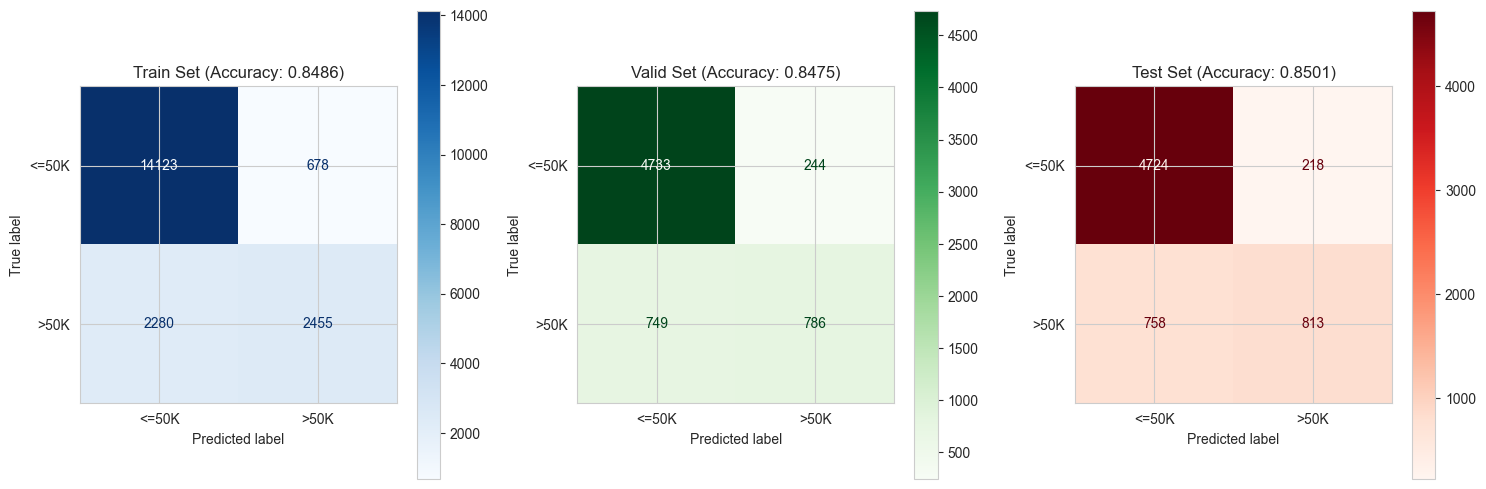

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Train Set
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['<=50K', '>50K'])
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title(f'Train Set (Accuracy: {train_metrics["Accuracy"]:.4f})')

# Valid Set
cm_valid = confusion_matrix(y_valid, y_valid_pred)
disp_valid = ConfusionMatrixDisplay(confusion_matrix=cm_valid, display_labels=['<=50K', '>50K'])
disp_valid.plot(ax=axes[1], cmap=plt.cm.Greens)
axes[1].set_title(f'Valid Set (Accuracy: {valid_metrics["Accuracy"]:.4f})')

# Test Set
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['<=50K', '>50K'])
disp_test.plot(ax=axes[2], cmap=plt.cm.Reds)
axes[2].set_title(f'Test Set (Accuracy: {test_metrics["Accuracy"]:.4f})')

plt.tight_layout()
plt.show()

## 여러 알고리즘 결과 확인

(대상) Decision Tree, randomForest, SVM, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인 
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### Models

In [31]:
models = {
    'DecisionTree': DecisionTreeClassifier(
        max_depth=5,              # 트리 최대 깊이 제한으로 과적합 방지
        min_samples_split=10,     # 노드 분할 시 최소 10개 샘플 필요
        min_samples_leaf=5,       # 리프 노드 최소 5개 샘플 보장
        random_state=RANDOM_STATE,
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100,         # 100개의 의사결정 트리로 앙상블 구성
        max_depth=5,              # 개별 트리 최대 깊이
        min_samples_split=5,      # 노드 분할 시 최소 5개 샘플 필요
        min_samples_leaf=2,       # 리프 노드 최소 2개 샘플 보장
        random_state=RANDOM_STATE,
    ),
    'SVM': SVC(
        kernel='rbf',             # RBF 커널로 비선형 패턴 학습
        C=1.0,                    # 정규화 파라미터 (기본값)
        gamma='scale',            # 커널 계수 (기본값)
        random_state=RANDOM_STATE,
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,         # 100개의 부스팅 라운드
        max_depth=6,              # 트리 최대 깊이
        learning_rate=0.1,        # 학습률 (작을수록 안정적이지만 느림)
        subsample=0.8,            # 샘플링 비율 (과적합 방지)
        colsample_bytree=0.8,     # 특성 샘플링 비율 (과적합 방지)
        random_state=RANDOM_STATE,
        eval_metric='logloss',    # 이진 분류용 평가 지표
        use_label_encoder=False,  # 경고 메시지 방지
    ),
    'LGBM': LGBMClassifier(
        n_estimators=100,         # 100개의 부스팅 라운드
        max_depth=6,              # 트리 최대 깊이
        learning_rate=0.1,        # 학습률
        subsample=0.8,            # 샘플링 비율
        colsample_bytree=0.8,     # 특성 샘플링 비율
        random_state=RANDOM_STATE,
        force_col_wise=True,      # 경고 메시지 방지
    ),
}

In [32]:
results = {}

for name, model in models.items():
    print(f"\n {name} 모델 학습 중 ...")
    
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 각 셋에 대한 예측
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test_pred = model.predict(X_test)
    
    # 각 셋의 성능 계산
    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # 결과 저장
    results[name] = {
        'train_accuracy': train_accuracy,
        'valid_accuracy': valid_accuracy,
        'test_accuracy': test_accuracy,
        'model': model
    }
    
    # 성능 출력
    print(f"{name} 학습 완료")
    print(f"   Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"   Valid Accuracy: {valid_accuracy:.4f} ({valid_accuracy*100:.2f}%)")
    print(f"   Test  Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    


 DecisionTree 모델 학습 중 ...
DecisionTree 학습 완료
   Train Accuracy: 0.8482 (84.82%)
   Valid Accuracy: 0.8478 (84.78%)
   Test  Accuracy: 0.8501 (85.01%)

 RandomForest 모델 학습 중 ...
RandomForest 학습 완료
   Train Accuracy: 0.8424 (84.24%)
   Valid Accuracy: 0.8418 (84.18%)
   Test  Accuracy: 0.8460 (84.60%)

 SVM 모델 학습 중 ...
SVM 학습 완료
   Train Accuracy: 0.7911 (79.11%)
   Valid Accuracy: 0.7968 (79.68%)
   Test  Accuracy: 0.7926 (79.26%)

 XGBoost 모델 학습 중 ...
XGBoost 학습 완료
   Train Accuracy: 0.8904 (89.04%)
   Valid Accuracy: 0.8650 (86.50%)
   Test  Accuracy: 0.8789 (87.89%)

 LGBM 모델 학습 중 ...
[LightGBM] [Info] Number of positive: 4735, number of negative: 14801
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 19536, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242373 -> initscore=-1.139713
[LightGBM] [Info] Start training from score -1.139713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [33]:
# 성능 비교 테이블
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train_Accuracy': [results[name]['train_accuracy'] for name in results.keys()],
    'Valid_Accuracy': [results[name]['valid_accuracy'] for name in results.keys()],
    'Test_Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
})

# 테스트 성능 기준으로 정렬
performance_df = performance_df.sort_values('Test_Accuracy', ascending=False)

print("\n=== Accuracy 성능 비교 ===")
print(performance_df.round(4))


=== Accuracy 성능 비교 ===
          Model  Train_Accuracy  Valid_Accuracy  Test_Accuracy
3       XGBoost          0.8904          0.8650         0.8789
4          LGBM          0.8878          0.8652         0.8786
0  DecisionTree          0.8482          0.8478         0.8501
1  RandomForest          0.8424          0.8418         0.8460
2           SVM          0.7911          0.7968         0.7926


In [34]:
# 과적합 분석
print("\n=== 과적합 분석 ===")
performance_df['Train_Valid_Diff'] = performance_df['Train_Accuracy'] - performance_df['Valid_Accuracy']
performance_df['Valid_Test_Diff'] = performance_df['Valid_Accuracy'] - performance_df['Test_Accuracy']

for _, row in performance_df.iterrows():
    model_name = row['Model']
    train_valid_diff = row['Train_Valid_Diff']
    valid_test_diff = row['Valid_Test_Diff']
    
    print(f"\n{model_name}:")
    if train_valid_diff > 0.05:
        print(f"  ⚠️  과적합 가능성 (Train-Valid 차이: {train_valid_diff:.4f})")
    else:
        print(f"  ✅ 과적합 위험 낮음 (Train-Valid 차이: {train_valid_diff:.4f})")
        
    if valid_test_diff > 0.05:
        print(f"  ⚠️  일반화 문제 (Valid-Test 차이: {valid_test_diff:.4f})")
    else:
        print(f"  ✅ 일반화 성능 양호 (Valid-Test 차이: {valid_test_diff:.4f})")


=== 과적합 분석 ===

XGBoost:
  ✅ 과적합 위험 낮음 (Train-Valid 차이: 0.0253)
  ✅ 일반화 성능 양호 (Valid-Test 차이: -0.0138)

LGBM:
  ✅ 과적합 위험 낮음 (Train-Valid 차이: 0.0227)
  ✅ 일반화 성능 양호 (Valid-Test 차이: -0.0134)

DecisionTree:
  ✅ 과적합 위험 낮음 (Train-Valid 차이: 0.0004)
  ✅ 일반화 성능 양호 (Valid-Test 차이: -0.0023)

RandomForest:
  ✅ 과적합 위험 낮음 (Train-Valid 차이: 0.0006)
  ✅ 일반화 성능 양호 (Valid-Test 차이: -0.0042)

SVM:
  ✅ 과적합 위험 낮음 (Train-Valid 차이: -0.0057)
  ✅ 일반화 성능 양호 (Valid-Test 차이: 0.0043)


### Best Model 

In [35]:
# 테스트 성능 기준으로 최고 모델 선택
best_model_name = performance_df.iloc[0]['Model']
best_model_instance = results[best_model_name]['model']
best_performance = results[best_model_name]

In [37]:
print(f"\n=== 최고 성능 모델 분석 ===")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_performance['test_accuracy']:.4f} ({best_performance['test_accuracy']*100:.2f}%)")

# 최고 모델의 상세 성능 분석
print(f"\n=== {best_model_name} 상세 성능 ===")
print(f"Train Accuracy: {best_performance['train_accuracy']:.4f} ({best_performance['train_accuracy']*100:.2f}%)")
print(f"Valid Accuracy: {best_performance['valid_accuracy']:.4f} ({best_performance['valid_accuracy']*100:.2f}%)")
print(f"Test  Accuracy: {best_performance['test_accuracy']:.4f} ({best_performance['test_accuracy']*100:.2f}%)")


=== 최고 성능 모델 분석 ===
Best Model: XGBoost
Test Accuracy: 0.8789 (87.89%)

=== XGBoost 상세 성능 ===
Train Accuracy: 0.8904 (89.04%)
Valid Accuracy: 0.8650 (86.50%)
Test  Accuracy: 0.8789 (87.89%)


In [38]:
# 다른 모델들과의 성능 비교
print(f"\n=== 다른 모델들과의 성능 비교 ===")
print("Test Accuracy 기준 순위:")
for i, (_, row) in enumerate(performance_df.iterrows(), 1):
    model_name = row['Model']
    test_acc = row['Test_Accuracy']
    if model_name == best_model_name:
        print(f"{i}. {model_name}: {test_acc:.4f} 🏆")
    else:
        print(f"{i}. {model_name}: {test_acc:.4f}")

print(f"\n 최종 결과: {best_model_name} 모델이 가장 우수")


=== 다른 모델들과의 성능 비교 ===
Test Accuracy 기준 순위:
1. XGBoost: 0.8789 🏆
2. LGBM: 0.8786
3. DecisionTree: 0.8501
4. RandomForest: 0.8460
5. SVM: 0.7926

 최종 결과: XGBoost 모델이 가장 우수


### Feature Importance

In [39]:
if hasattr(best_model_instance, 'feature_importances_'):
    feature_importances = best_model_instance.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': feature_importances
    })
    
    # 중요도 기준으로 정렬
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    print(f"Feature Importance - Top10:")
    print(importance_df.head(10).round(4))
    
else:
    print(f"Feature importance is not available.")

Feature Importance - Top10:
                              Feature  Importance
32       marital-status_Never-married      0.2503
30  marital-status_Married-civ-spouse      0.1665
3                        capital-gain      0.0421
2                       education-num      0.0344
53                  relationship_Wife      0.0313
52             relationship_Unmarried      0.0310
51             relationship_Own-child      0.0298
27              education_Prof-school      0.0297
49         relationship_Not-in-family      0.0286
58                           sex_Male      0.0248


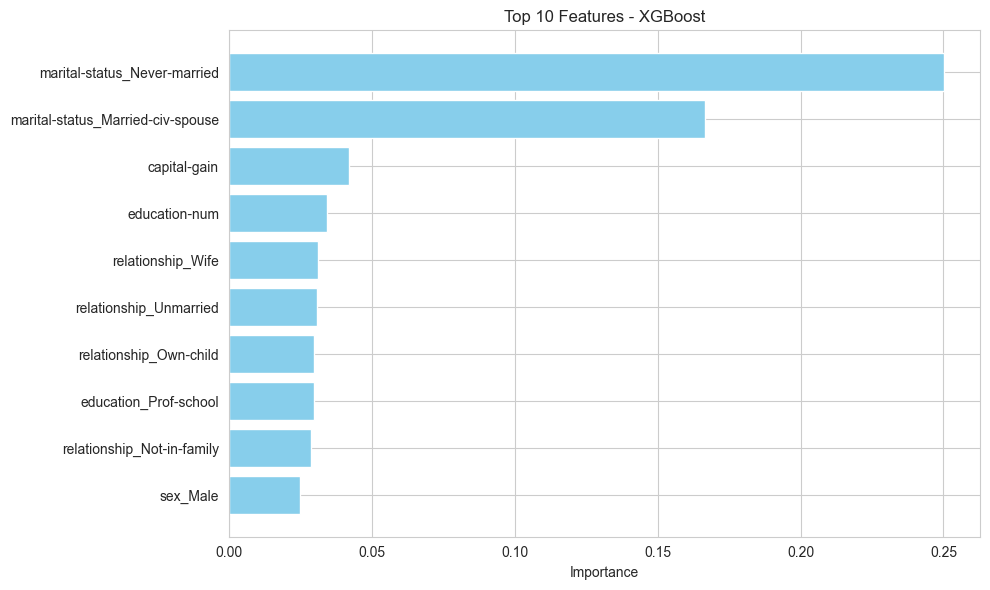

In [40]:
if hasattr(best_model_instance, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    
    top_10 = importance_df.head(10)
    plt.barh(range(len(top_10)), top_10['Importance'], color='skyblue')
    plt.yticks(range(len(top_10)), top_10['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Features - {best_model_name}')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()

### Predict 

In [41]:
# Best Model로 예측 수행
y_train_pred = best_model_instance.predict(X_train)
y_valid_pred = best_model_instance.predict(X_valid)
y_test_pred = best_model_instance.predict(X_test)

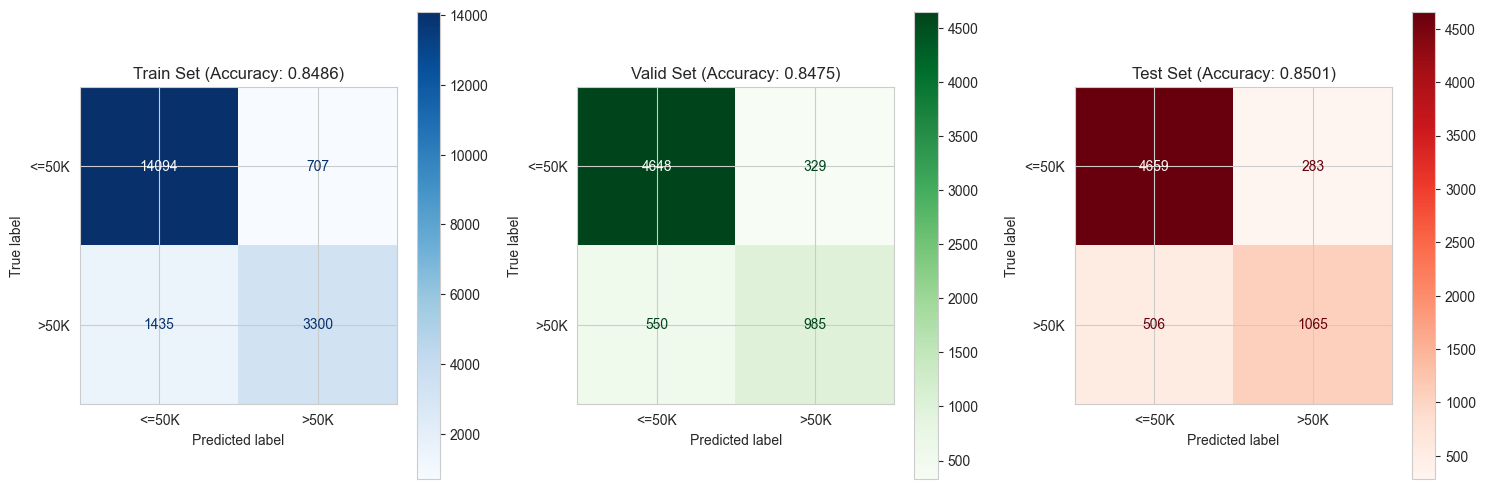

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Train Set
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['<=50K', '>50K'])
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title(f'Train Set (Accuracy: {train_metrics["Accuracy"]:.4f})')

# Valid Set
cm_valid = confusion_matrix(y_valid, y_valid_pred)
disp_valid = ConfusionMatrixDisplay(confusion_matrix=cm_valid, display_labels=['<=50K', '>50K'])
disp_valid.plot(ax=axes[1], cmap=plt.cm.Greens)
axes[1].set_title(f'Valid Set (Accuracy: {valid_metrics["Accuracy"]:.4f})')

# Test Set
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['<=50K', '>50K'])
disp_test.plot(ax=axes[2], cmap=plt.cm.Reds)
axes[2].set_title(f'Test Set (Accuracy: {test_metrics["Accuracy"]:.4f})')

plt.tight_layout()
plt.show()

# End of Documents